# Chapter 6: A Classic Model – The Kinetics of Michaelis and Menten


# Lab 2: Simulating Enzyme Kinetics and Validating the QSSA



In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
# Step 2: Define the ODE System
def enzyme_kinetics_odes(t, y, k1, k_minus_1, k2):
    E, S, C, P = y
    dEdt = -k1 * E * S + (k_minus_1 + k2) * C
    dSdt = -k1 * E * S + k_minus_1 * C
    dCdt =  k1 * E * S - (k_minus_1 + k2) * C
    dPdt =  k2 * C
    return [dEdt, dSdt, dCdt, dPdt]


In [3]:
# Step 3: Set Parameters and Initial Conditions
# Rate constants
k1 = 1.0        # M^-1 s^-1
k_minus_1 = 0.1 # s^-1
k2 = 0.5        # s^-1

# Initial concentrations
E0 = 0.1        # M
S0 = 10.0       # M
C0 = 0        # M
P0 = 0.0        # M
y0 = [E0, S0, C0, P0]

# Time span for simulation
t_span = [0, 500]
t_eval = np.linspace(t_span[0], t_span[1], 100000)


In [4]:
# Step 4: Solve the ODE System
sol = solve_ivp(
    fun=enzyme_kinetics_odes,
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    args=(k1, k_minus_1, k2)
)
E, S, C, P = sol.y


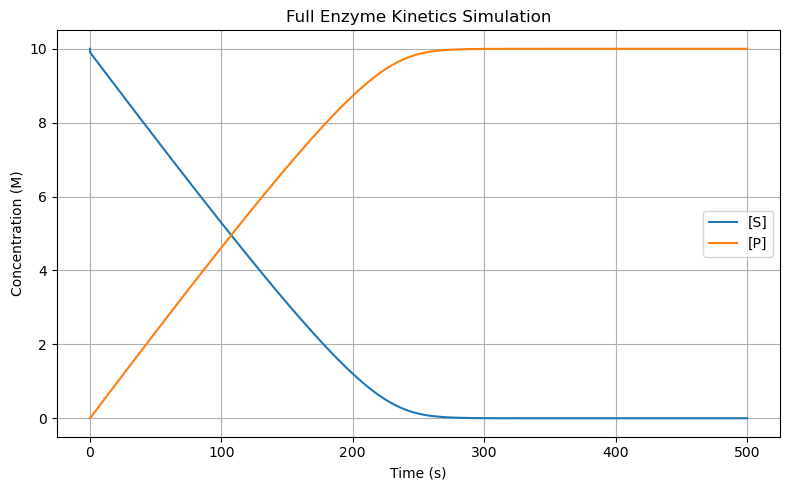

In [5]:
# Step 5: Plot Time-Course of Species Concentrations
fig, ax = plt.subplots(figsize=(8, 5))
#ax.plot(sol.t, E, label='[E]')
ax.plot(sol.t, S, label='[S]')
#ax.plot(sol.t, C, label='[C]')
ax.plot(sol.t, P, label='[P]')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration (M)")
ax.set_title("Full Enzyme Kinetics Simulation")
ax.legend()
#plt.yscale('log')
ax.grid(True)
plt.tight_layout()
plt.show()


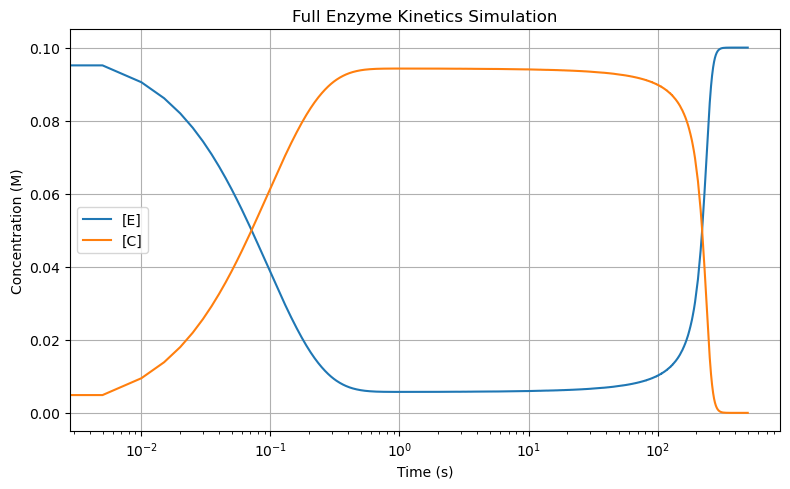

In [7]:
# Step 5: Plot Time-Course of Species Concentrations
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(sol.t, E, label='[E]')
#ax.plot(sol.t, S, label='[S]')
ax.plot(sol.t, C, label='[C]')
#ax.plot(sol.t, P, label='[P]')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Concentration (M)")
ax.set_title("Full Enzyme Kinetics Simulation")
ax.legend()
plt.xscale('log')
ax.grid(True)
plt.tight_layout()
plt.show()


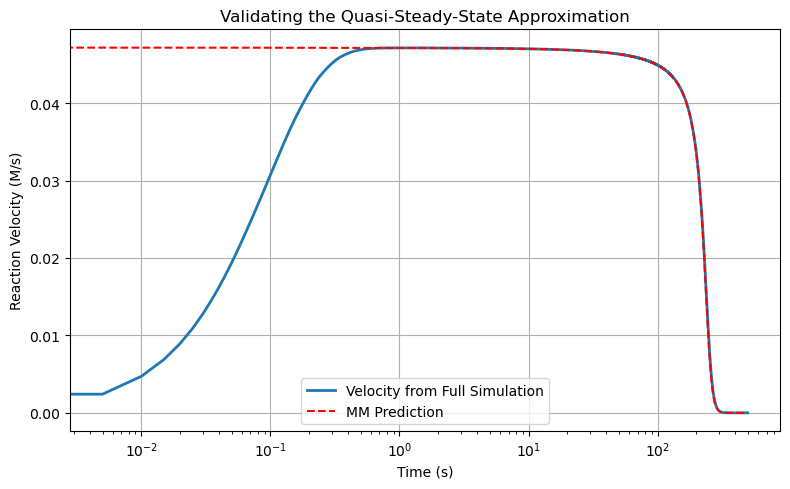

In [9]:
# Step 6: Compare with Michaelis-Menten Approximation

# Calculate Vmax and Km
E_total = E0
Vmax = k2 * E_total
Km = (k_minus_1 + k2) / k1

# Reaction velocity from simulation (numerical derivative)
v_simulation = np.gradient(P, sol.t)

# MM-predicted velocity using S(t)
v_mm_prediction = (Vmax * S) / (Km + S)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(sol.t, v_simulation, label='Velocity from Full Simulation', lw=2)
ax.plot(sol.t, v_mm_prediction, '--', color='red', label='MM Prediction')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Reaction Velocity (M/s)")
ax.set_title("Validating the Quasi-Steady-State Approximation")
ax.legend()
plt.xscale('log')
ax.grid(True)
plt.tight_layout()
plt.show()
